# K-means Clustering and Principal Component Analysis
In this exercise, you will implement the K-means clustering algorithm and apply it to compress an image. In the second part, you will use principal component analysis to find a low-dimensional representation of face images.

#### K-means Clustering
In this this exercise, you will implement the K-means algorithm and use it for image compression.

(Programming assignments that I implemented in python of Machine Learning Course (it uses Octave/MATLAB)



### Finding Closest Centroids

In [349]:
import numpy as np
import scipy.io as sio
import scipy.misc as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat 


from matplotlib.colors import ListedColormap, NoNorm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [350]:
data1 = loadmat('data/ex7data2.mat')
X = data1["X"]

In [351]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0],1))
    temp = np.zeros((centroids.shape[0],1))
    
    for i in range(X.shape[0]):
        for j in range(K):
            dist = X[i,:] - centroids[j,:]
            length = np.sum(dist**2)
            temp[j] = length
        idx[i] = np.argmin(temp)+1
    return idx

# Select an initial set of centroids
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = find_closest_centroids(X, initial_centroids)
print("Closest centroids for the first 3 examples:\n",idx[0:3])

Closest centroids for the first 3 examples:
 [[1.]
 [3.]
 [2.]]


###  Computing Centroid Means

In [352]:
def compute_centroids(X, idx, K):
    m, n = X.shape[0],X.shape[1]
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))
    
    for i in range(m):
        index = int((idx[i]-1)[0])
        centroids[index,:]+=X[i,:]
        count[index]+=1
    
    return centroids/count

In [353]:
centroids = compute_centroids(X, idx, K)
print("Centroids computed after initial finding of closest centroids:\n", centroids)

Centroids computed after initial finding of closest centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


### Visualizing K-means Clustering



In [354]:
def plot_Kmeans(X, centroids, idx, K, num_iters):
    m,n = X.shape[0],X.shape[1]
    fig, ax = plt.subplots(nrows=num_iters,ncols=1,figsize=(6,36))
    
    for i in range(num_iters):    
        color = "rgb"
        for k in range(1,K+1):
            grp = (idx==k).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0],X[grp[:,0],1],c=color[k-1],s=15)

        ax[i].scatter(centroids[:,0],centroids[:,1],s=120,marker="x",c="black",linewidth=3)
        title = "Iteration Number " + str(i)
        ax[i].set_title(title)
        
        centroids = compute_centroids(X, idx, K)
        
        idx = find_closest_centroids(X, centroids)
    
    plt.tight_layout()


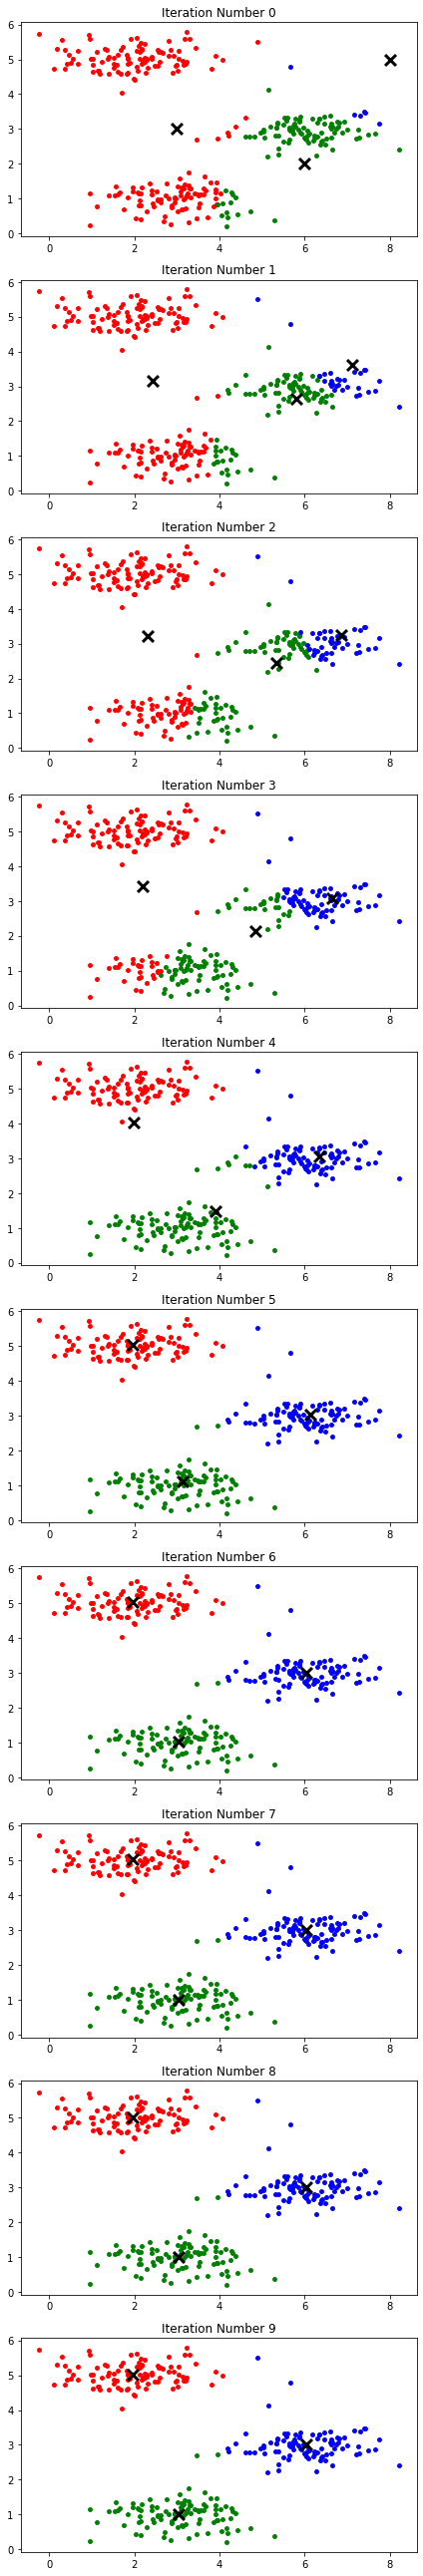

In [355]:
m,n = X.shape[0],X.shape[1]
plot_Kmeans(X, initial_centroids,idx, K,10)

### Random Initialization


In [356]:
def kmeans_init_centroids(X, K):
    m, n = X.shape[0], X.shape[1]
    centroids = np.zeros((K, n))

    for i in range(K):
        centroids[i] = X[np.random.randint(0, m+1),:]
    return centroids

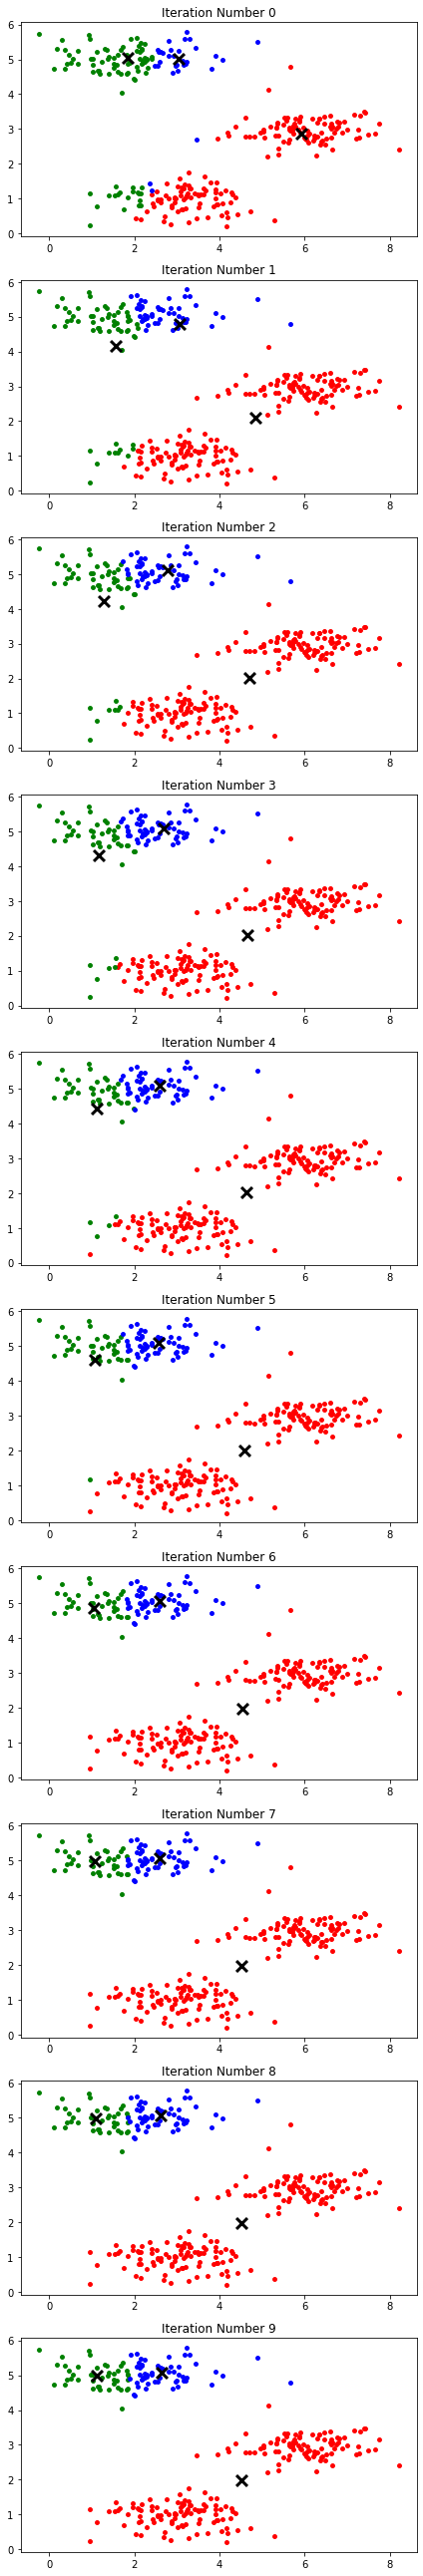

In [357]:
centroids = kmeans_init_centroids(X, K)
idx = find_closest_centroids(X, centroids)
plot_Kmeans(X, centroids, idx, K, 10)

### Image Compression with K-means

In [368]:
data2 = loadmat('data/bird_small.mat')
A = data2['A']

X2 = (A/255).reshape(128*128, 3)

In [369]:
def run_kmeans(X, initial_centroids, num_iters, K):
    idx = find_closest_centroids(X, initial_centroids)

    for i in range(num_iters):
        centroids = compute_centroids(X, idx, K)
        idx = find_closest_centroids(X, initial_centroids)

    return centroids, idx

In [370]:
K2 = 16
num_iters = 10
initial_centroids2 = kmeans_init_centroids(X2, K2)
centroids2, idx2 = run_kmeans(X2, initial_centroids2, num_iters,K2)

In [374]:
m2,n2 = X.shape[0],X.shape[1]
X2_recovered = X2.copy()
for i in range(1,K2+1):
    X2_recovered[(idx2==i).ravel(),:] = centroids2[i-1]

X2_recovered = X2_recovered.reshape(128,128,3)

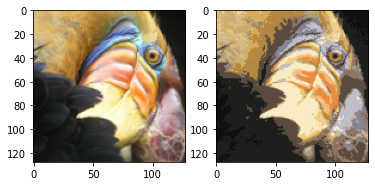

In [375]:
import matplotlib.image as mpimg

fig, ax = plt.subplots(1,2)
ax[0].imshow(X2.reshape(128,128,3))
ax[1].imshow(X2_recovered)

### Principal Component Analysis


In [378]:
data3 =loadmat('data/ex7data1.mat')
X3 = data3["X"]

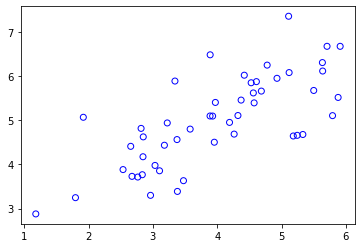

In [379]:
plt.scatter(X3[:, 0], X3[:, 1], marker="o",facecolors="none",edgecolors="b")

### Implementing PCA


In [385]:
def feature_Normalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm = (X - mu)/sigma
    
    return X_norm, mu , sigma

In [386]:
def pca(X):
    m,n = X.shape[0], X.shape[1]
    
    sigma = 1/m * X.T @ X
    
    U,S,V = svd(sigma)
    
    return U,S,V

In [387]:
from numpy.linalg import svd
X_norm,mu,std = feature_Normalize(X3)
U,S = pca(X_norm)[:2]

(2.0, 8.0)

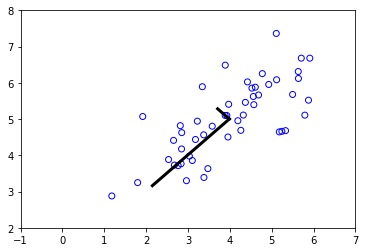

In [390]:
plt.scatter(X3[:,0],X3[:,1],marker="o",facecolors="none",edgecolors="b")

plt.plot([mu[0],(mu+1.5*S[0]*U[:,0].T)[0]],
         [mu[1],(mu+1.5*S[0]*U[:,0].T)[1]],
         color="black",linewidth=3)

plt.plot([mu[0],(mu+1.5*S[1]*U[:,1].T)[0]],
         [mu[1],(mu+1.5*S[1]*U[:,1].T)[1]],
         color="black",linewidth=3)

plt.xlim(-1,7)
plt.ylim(2,8)

In [391]:
print("Top eigenvector U(:,1) =:",U[:,0])

Top eigenvector U(:,1) =: [-0.70710678 -0.70710678]


### Dimensionality reduction with PCA


In [392]:
def project_Data(X, U, K):
    m = X.shape[0]
    U_reduced = U[:, :K]
    Z = np.zeros((m,K))

    for i in range(m):
        for j in range(K):
            Z[i,j] = X[i, :] @ U_reduced[:, j]

    return Z

In [393]:
K = 1
Z = project_Data(X_norm, U, K)
print("rojection of the first example:", Z[0][0])

rojection of the first example: 1.4963126084578515


### Reconstructing an approximation of the data


In [395]:
def recover_Data(Z, U, K):
    m,n = Z.shape[0],U.shape[0]
    X_rec = np.zeros((m,n))
    U_reduced = U[:,:K]
    
    for i in range(m):
        X_rec[i,:] = Z[i,:] @ U_reduced.T
    
    return X_rec

In [396]:
X_rec  = recover_Data(Z, U, K)
print("Approximation of the first example:",X_rec[0,:])

Approximation of the first example: [-1.05805279 -1.05805279]


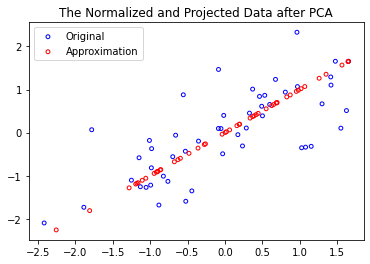

In [397]:
plt.scatter(X_norm[:,0],X_norm[:,1],marker="o",
                                    label="Original",
                                    facecolors="none",
                                    edgecolors="b",s=15)

plt.scatter(X_rec[:,0],X_rec[:,1],marker="o",
                                  label="Approximation",
                                  facecolors="none",
                                  edgecolors="r",s=15)

plt.title("The Normalized and Projected Data after PCA")
plt.legend()

### Face Image Dataset


In [398]:
data4 = loadmat("data/ex7faces.mat")
X4 = data4["X"]

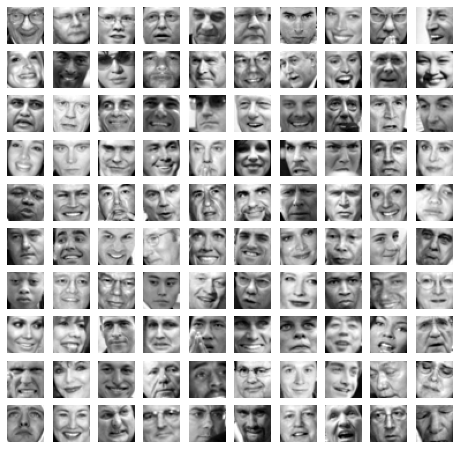

In [401]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax[int(i/10),j].imshow(X4[i+j, :].reshape(32, 32, order="F"), cmap="gray")
        ax[int(i/10),j].axis("off")

### PCA on face


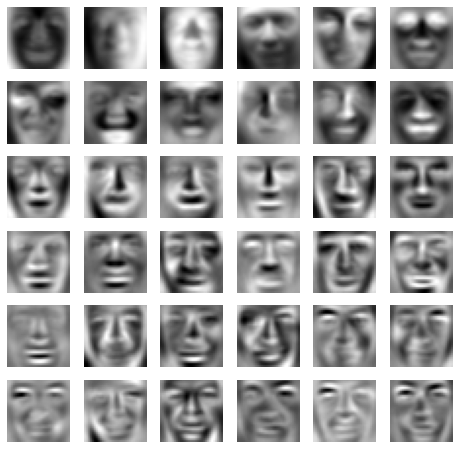

In [402]:
X_norm2 = feature_Normalize(X4)[0]
U2 = pca(X_norm2)[0]

U_reduced = U2[:,:36].T
fig2, ax2 = plt.subplots(6,6,figsize=(8,8))
for i in range(0,36,6):
    for j in range(6):
        ax2[int(i/6),j].imshow(U_reduced[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax2[int(i/6),j].axis("off")

In [403]:
K2 = 100
Z2 = project_Data(X_norm2, U2, K2)
print("The projected data Z has a size of:",Z2.shape)

The projected data Z has a size of: (5000, 100)


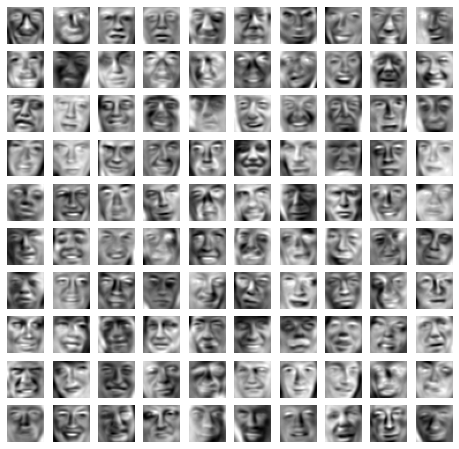

In [405]:
X_rec2  = recover_Data(Z2, U2, K2)

# Visualize the reconstructed data
fig3, ax3 = plt.subplots(10,10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax3[int(i/10),j].imshow(X_rec2[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax3[int(i/10),j].axis("off")